<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
#Write a program that calculates  e−x
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

def factorial(n):
  fac = 1
  while n != 0:
    fac = fac*n
    n -= 1
  return fac

def e_to_xth(x, rtol = 1e-7, nth_term = lambda n,x : (-1)**n*(x**n/factorial(n)), max_iter=200):

  Sn = 0
  n=0
  a_ = lambda n : nth_term(n,x)

  while abs(a_(n+1))>abs(rtol*Sn) and n < max_iter :
    Sn += a_(n)
    n += 1

  return Sn

print(e_to_xth(0.4),exp(-0.4))

0.6703203555555554 0.6703200460356393


In [ ]:
e_to_xth(9.9999)

4.5404476249320634e-05

In [ ]:
print(e_to_xth(10))

def aux(x, rtol = 1e-7, nth_term = lambda n,x : (-1)**n*(x**n/factorial(n)), max_iter=200):

  Sn = 0
  n=0
  a_ = lambda n : nth_term(n,x)

  while abs(a_(n+1)) > abs(rtol*Sn):
    if n==9:
      print('para ',n,'=9 los terminos son ' ,a_(n),a_(n+1),' y su resta es: ',a_(n)+a_(n+1))

    Sn += a_(n)
    n += 1

  return Sn



print('la diferencia entre aux(9.9999999999)-exp(-9.9999999999) es :',aux(9.9999999999)-exp(-9.9999999999),' lo que es distinto de 0')
print('utilizando exp(-x)=1/exp(x) tenemos: que exp(9.9999999999)',1/exp(-9.9999999999),' lo cual es un resultado muy impreciso')

4.5399936295743496e-05
para  9 =9 los terminos son  -2755.731922150573 2755.731922123016  y su resta es:  -2.755723471636884e-08
la diferencia entre aux(9.9999999999)-exp(-9.9999999999) es : 7.242152332746863e-12  lo que es distinto de 0
utilizando exp(-x)=1/exp(x) tenemos: que exp(9.9999999999) 22026.46579260407  lo cual es un resultado muy impreciso


In [ ]:
for i in range(1,101):
  print('x=',i,'e^x=',e_to_xth(i),', diferencia entre la serie y su aproximacion mejorada:',e_to_xth(i)-1/(e_to_xth(-i)))

x= 1 e^x= 0.3678791887125221 , diferencia entre la serie y su aproximacion mejorada: -2.9345006746783753e-07
x= 2 e^x= 0.13533530549403575 , diferencia entre la serie y su aproximacion mejorada: -5.8039421046984785e-09
x= 3 e^x= 0.0497870766692686 , diferencia entre la serie y su aproximacion mejorada: 2.1238159286784963e-09
x= 4 e^x= 0.018315641219919312 , diferencia entre la serie y su aproximacion mejorada: -2.2143473339675257e-09
x= 5 e^x= 0.006737947579184599 , diferencia entre la serie y su aproximacion mejorada: -1.745932491463431e-09
x= 6 e^x= 0.0024787514789560493 , diferencia entre la serie y su aproximacion mejorada: -1.6664159037046988e-09
x= 7 e^x= 0.0009118818129335872 , diferencia entre la serie y su aproximacion mejorada: -5.072938668530119e-10
x= 8 e^x= 0.00033546259492638574 , diferencia entre la serie y su aproximacion mejorada: -1.5211392817007438e-10
x= 9 e^x= 0.00012340983673634218 , diferencia entre la serie y su aproximacion mejorada: -5.018966172569764e-12
x= 1

aproximada mente a partir de x=11 la funci'on comienza a perder precisi'on, (esto se ve claramente ya que la diferencia entre la aproximaci'on mas presisa y nuestra serie original comienza a crecer comienza a crecer).

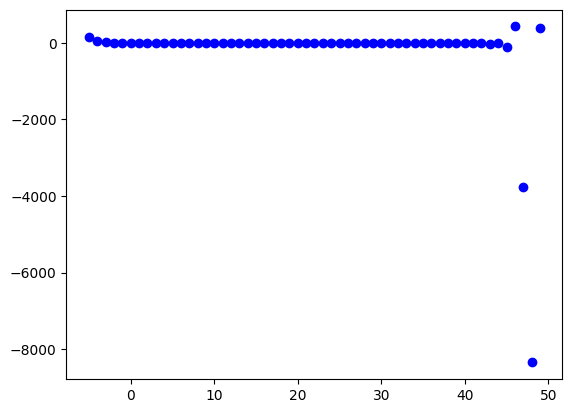

In [ ]:
plt.figure()

for x in range(-5,50):
  plt.plot(x,e_to_xth(x),'bo')

In [271]:
def serie(a_, start = 1, stop = None, lista=False, sn1=False):
  if stop == None:
    stop=start
    start = 1

  conjunto = range(start,stop+1)
  if lista==False:
    a_n=[a_(n) for n in conjunto]
    return sum(a_n)
  elif lista==True:
    ret=[0]
    for n in conjunto:
      ret.append(ret[-1]+a_(n))
    ret.remove(0)
    if sn1==True:
      return np.array(ret[1::2])
    else:
      return np.array(ret)

def sn1(N, lista=False):
  return serie(lambda n : (-1)**n*(n/(n+1)), stop = 2*N, lista=lista, sn1=True)

def sn2(N, lista=False):
  return serie(lambda n : -(2*n-1)/(2*n), stop = N, lista=lista) + serie(lambda n : (2*n)/(2*n+1), stop = N, lista=lista)

def sn3(N, lista=False):
  return serie(lambda n : 1/(2*n*(2*n+1)), stop = N, lista=lista)

<ipython-input-272-ccc1e47f64c9>:7: RuntimeWarning: divide by zero encountered in log10
  y1 = np.log10(E(sn1,n))
<ipython-input-272-ccc1e47f64c9>:8: RuntimeWarning: divide by zero encountered in log10
  y2 = np.log10(E(sn2,n))


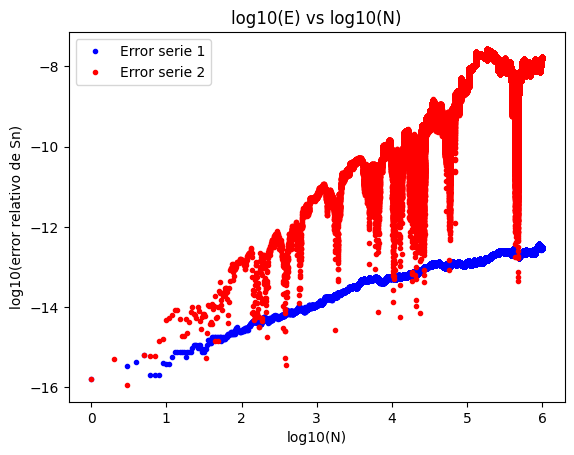

In [272]:
n=1000000
rango=range(1,n+1)

E = lambda sni, N : np.array(abs((sni(N,lista=True)-sn3(N,lista=True))/sn3(N,lista=True)))

x = [np.log10(n) for n in rango]
y1 = np.log10(E(sn1,n))
y2 = np.log10(E(sn2,n))

plt.plot(x,y1,'b.')
plt.plot(x,y2,'r.')

plt.title('log10(E) vs log10(N)')
plt.xlabel('log10(N)')
plt.ylabel('log10(error relativo de Sn)')
plt.legend(['Error serie 1','Error serie 2'],)

en general las 2 series tiene resultados bastante similares (el error relativo es pequeño), pero la magnitud de los errores es considerablemente distinta, además para la primera serie no son fáciles de ver las regiones de convergencia del algoritmo, para la segunda serie por otro lado son más claras las regiones de convergencia (dónde comienza a decrecer rápidamente el error relativo)